# **PROJETO DE ANÁLISES DE DADOS E-COMMERCE- OLIST**

![](https://blog.caju.com.br/wp-content/uploads/2022/08/case-olist.webp)

![](![image.png](attachment:image.png))

## INTRODUÇÃO

Vamos analisar o conjunto de comércio eletrônico brasileiro de pedidos feitos na loja Olist.

Olist é uma plataforma de comércio eletrônico brasileira que conecta pequenas empresas a canais de vendas online, permitindo que vendam seus produtos em vários marketplaces do Brasil. A empresa também oferece serviços de logística e gerenciamento de pedidos para seus clientes.

O conjunto de dados possui informações de 100 mil pedidos de 2016 a 2018 realizados em vários marketplaces no Brasil. Suas características permitem visualizar um pedido em múltiplas dimensões: desde o status do pedido, preço, desempenho de pagamento e frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes. Também lançamos um conjunto de dados de geolocalização que relaciona os códigos postais brasileiros às coordenadas (latitude/longitude).

Estes são dados comerciais reais, foram anonimizados e as referências às empresas e parceiros no texto da revisão foram substituídas pelos nomes das grandes casas de Game of Thrones.

<p>A <strong>análise exploratória de dados</strong> é uma das principais técnicas utilizadas em <strong>Data Science</strong>, pois nos permite compreender melhor os dados e encontrar <em>insights</em> valiosos que podem ser usados em decisões de negócios. Neste notebook, vamos explorar a base de dados da Olist e responder algumas perguntas importantes sobre o comportamento dos consumidores no mercado de e-commerce.</p>

<p>Para isso, usaremos a linguagem <strong>Python</strong> e as bibliotecas <strong>Pandas</strong>, <strong>Numpy</strong> e <strong>Matplotlib</strong> para manipulação e visualização de dados. Além disso, utilizaremos a biblioteca <strong>Plotly</strong> para criar gráficos interativos e mais complexos, permitindo uma análise mais detalhada dos dados.</p>




<h2 style="color: #6c5b7b"> Perguntas a serem respondidas</h2>

- Quais valores médio  e máximo dos fretes?
- Como se comportam as notas de avaliações dos consumidores?
- Quais cliente geram maiores receitas e que mais gastam?
- Quais os top 10 Estados com maiores números de pedidos?
- Quais as cidades com maiores receitas?
- Como os pedidos variam com otempo?
- Quais maiores números de pedidos por semana?
- Quais produtos com melhores e piores avaliações?
- Será que o método de pagamentos afetam os status do  pedido?
- Existem relação entre o tempo de entrega e as avaliações?
- Quais pedidos mais rápidos e mais demorados em prazo de entrega?
- Quais as cidaddes dos vendedores com maiores e menores tempo de entrega?
- Quais vendedores com melhores e piores prazo de entrega?

<h2 style="color: #6c5b7b">Importar bibliotecas</h2>

Este trecho de código importa algumas das principais bibliotecas utilizadas em análise de dados com Python, incluindo as bibliotecas para visualização de dados `matplotlib.pyplot`, `plotly.graph_objects` e `plotly.express`. 
                
- `pandas` é uma biblioteca para manipulação e análise de dados, incluindo estruturas de dados e ferramentas para leitura e escrita de arquivos.
- `numpy` é uma biblioteca para computação numérica com Python, que inclui funções para manipulação de arrays e matrizes multidimensionais.
- `matplotlib.pyplot` é uma biblioteca para visualização de dados em Python, que inclui funções para criação de gráficos e visualizações.
- `plotly.graph_objects` é uma biblioteca para criação de gráficos interativos e complexos, que permite a personalização completa dos gráficos.
- `plotly.express` é uma biblioteca de visualização de dados de alto nível baseada no `plotly.graph_objects`, que oferece uma interface fácil de usar para a criação de gráficos estatísticos atraentes e informativos.
- `datetime` é um módulo que fornece classes para trabalhar com datas e horários em Python.
- `warnings` é um módulo que permite emitir avisos durante a execução do código.

O último comando `warnings.filterwarnings("ignore")` é usado para ignorar os avisos que podem aparecer durante a execução do código. Serve somente pra "limpar" nossas saídas de muitos avisos. 

In [1]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# Mais elaborados
import plotly.graph_objects as go
# Mais fácil, de pronto tem gráficos bonitos
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
#pio.renderers.default = "png" # visualizar e salvar em foto para git
#pio.renderers.default = "notebook" # visualizar em outra IDE
pio.renderers.default ='jpeg'# visualizar em outra IDE

In [5]:
 !pip install -U kaleido

<h2 style="color: #6c5b7b">Importar os dados</h2>

Vamos utilizar a base de dados da Olist que está disponível no Kaggle. Kaggle é uma plataforma de ciência de dados com competições, cursos e conjuntos de dados para profissionais, pesquisadores e estudantes nas diferentes áreas de dados. Para baixar os dados basta se inscrever e baixar [aqui](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

Este trecho de código carrega os dados em formato CSV de diferentes arquivos localizados no diretório `./data/raw/`, usando a biblioteca `pandas` para criar um `DataFrame` para cada arquivo. 

A subpasta `raw` é usada para armazenar os dados brutos, sem nenhum processamento ou limpeza. É útil para manter uma cópia dos dados originais em seu estado bruto, caso seja necessário voltar aos dados originais ou para rastrear o histórico das modificações feitas nos dados.

Além da pasta `raw` temos a `processed` que é usada para armazenar os dados após passarem por processos de limpeza, transformação e manipulação para fins de análise de dados. 

- `pd.read_csv()` é uma função da biblioteca `pandas` que lê um arquivo CSV e retorna um `DataFrame`.
- `customers_df`, `geo_df`, `orderitem_df`, `orderpay_df`, `orderreviews_df`, `orders_df`, `products_df`, `sellers_df` e `categname_df` são os nomes dos `DataFrames` criados para cada arquivo CSV.
- `pd.set_option('display.max_columns', 500)` é um comando usado para definir o número máximo de colunas que podem ser exibidas na saída dos `DataFrames`.

É importante entender melhor as fontes de dados, normalmente os dados são acompanhados de `metadados`, que descrevem o conteúdo das bases. 

In [6]:
# lendo o primeiro dataset
customers_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_customers_dataset.csv")
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
# lendo os dataset em 500 Linhas
customers_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_customers_dataset.csv")
geo_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_geolocation_dataset.csv")
orderitem_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_order_items_dataset.csv")
orderpay_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_order_reviews_dataset.csv")
orders_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_orders_dataset.csv")
products_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_products_dataset.csv")
sellers_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\olist_sellers_dataset.csv")
categname_df = pd.read_csv(r"C:\Users\vanio\OneDrive\Área de Trabalho\olist\product_category_name_translation.csv")
pd.set_option('display.max_columns', 500)

In [8]:
# Vendo as 10 linhas do arquivo de clientes
customers_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [9]:
# Quantas linhas e colunas tem o dataframe de clientes
customers_df.shape

(99441, 5)

## Conhecendo os dados!

Aqui é interessante observar os dados para que se possa ter ideia das variáveis analisadas

In [10]:
# imprimindo em 2 linhas os dataset
print("customers_df:")
display(customers_df.head(2))

print("\ngeo_df:")
display(geo_df.head(2))

print("\norderitem_df:")
display(orderitem_df.head(2))

print("\norderpay_df:")
display(orderpay_df.head(2))

print("\norderreviews_df:")
display(orderreviews_df.head(2))

print("\norders_df:")
display(orders_df.head(2))

print("\nproducts_df:")
display(products_df.head(2))

print("\nsellers_df:")
display(sellers_df.head(2))

print("\ncategname_df:")
display(categname_df.head(2))

customers_df:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP



geo_df:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP



orderitem_df:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93



orderpay_df:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39



orderreviews_df:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13



orders_df:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00



products_df:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0



sellers_df:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP



categname_df:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


### Aqui é melhor buscar as informações do dataset para melhor conhecê-los!

In [11]:
# buscando informações sobre os dataset
print("customers_df:\n")
display(customers_df.info())

print("\ngeo_df:\n")
display(geo_df.info())

print("\norderitem_df:\n")
display(orderitem_df.info())

print("\norderpay_df:\n")
display(orderpay_df.info())

print("\norderreviews_df:\n")
display(orderreviews_df.info())

print("\norders_df:\n")
display(orders_df.info())

print("\nproducts_df:\n")
display(products_df.info())

print("\nsellers_df:\n")
display(sellers_df.info())

print("\ncategname_df:\n")
display(categname_df.info())

customers_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


geo_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None


orderitem_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


orderpay_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


orderreviews_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None


orders_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


products_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


sellers_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None


categname_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

<h2 style="color: #6c5b7b">Renomeando Colunas</h2>

Este trecho de código renomeia a coluna `customer_zip_code_prefix` do `DataFrame` `customers_df` para `zip_code` e a coluna `geolocation_zip_code_prefix` do `DataFrame` `geo_df` para `zip_code`, usando o método `rename()` da biblioteca `pandas`. 

- `customers_df` e `geo_df` são `DataFrames` que foram criados anteriormente a partir de arquivos CSV.
- `{"customer_zip_code_prefix": "zip_code"}` e `{"geolocation_zip_code_prefix": "zip_code"}` são dicionários que indicam os nomes antigos e novos das colunas que devem ser renomeadas, respectivamente.
- `rename()` é um método do objeto `DataFrame` que permite renomear colunas, índices ou ambos em um `DataFrame`.
- `customers_df = customers_df.rename(columns={"customer_zip_code_prefix": "zip_code"})` e `geo_df = geo_df.rename(columns={"geolocation_zip_code_prefix": "zip_code"})` são as atribuições que fazem com que as alterações sejam salvas nos próprios `DataFrames` originais, em vez de criar novos `DataFrames` com as alterações.

Renomear colunas pode ser útil em várias situações, como quando as colunas têm nomes longos e complicados, nomes com caracteres especiais ou para tornar os nomes das colunas mais descritivos e padronizados. Nesse caso, é somente para facilitar juntarmos os dados das bases de clientes e de geolocalizacao (por meio do CEP)


In [12]:
# aqui renomeamos a a coluna CEP
customers_df = customers_df.rename(columns={"customer_zip_code_prefix": "zip_code"})
geo_df = geo_df.rename(columns={"geolocation_zip_code_prefix": "zip_code"})

In [13]:
customers_df.head()

,customer_id,customer_unique_id,zip_code,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Aqui vamos buscar as colunas para verificar as em comuns e fazer um "merge"

In [14]:
#  imprimir colunas dos dataset

print("customers_df:\n")
display(customers_df.columns)

print("\ngeo_df:\n")
display(geo_df.columns)

print("\norderitem_df:\n")
display(orderitem_df.columns)

print("\norderpay_df:\n")
display(orderpay_df.columns)

print("\norderreviews_df:\n")
display(orderreviews_df.columns)

print("\norders_df:\n")
display(orders_df.columns)

print("\nproducts_df:\n")
display(products_df.columns)

print("\nsellers_df:\n")
display(sellers_df.columns)

print("\ncategname_df:\n")
display(categname_df.columns)

customers_df:



Index(['customer_id', 'customer_unique_id', 'zip_code', 'customer_city',
       'customer_state'],
      dtype='object')


geo_df:



Index(['zip_code', 'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state'],
      dtype='object')


orderitem_df:



Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


orderpay_df:



Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


orderreviews_df:



Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


orders_df:



Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


products_df:



Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


sellers_df:



Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


categname_df:



Index(['product_category_name', 'product_category_name_english'], dtype='object')

<h2 style="color: #6c5b7b">Fazendo um merge dos dataframes!</h2>

Este trecho de código combina os DataFrames `orders_df`, `customers_df`, `orderitem_df`, `products_df`, `categname_df`, `orderpay_df`, `sellers_df` e `orderreviews_df`, usando o método `merge()` da biblioteca `pandas`. Cada DataFrame é combinado com o próximo usando uma coluna em comum como chave de junção. 

O resultado da combinação é salvo em um novo DataFrame chamado `dados_completos`. Ao final dessa operação, o DataFrame `dados_completos` contém informações sobre os pedidos, clientes, itens do pedido, produtos, categorias de produtos, pagamentos, vendedores e avaliações de pedidos.

Esse processo de combinar vários DataFrames em um só é útil para consolidar dados dispersos em um único lugar e facilitar a análise dos dados.


In [15]:
# Fazendo um "merge" juntando todos os dataframes para melhor análisar
data = orders_df.merge(customers_df, on="customer_id").merge(orderitem_df, on="order_id").merge(products_df, on="product_id").merge(categname_df, on="product_category_name").merge(orderpay_df, on="order_id").merge(sellers_df, on="seller_id").merge(orderreviews_df, on="order_id")

In [16]:
# lendo o dataframe completo
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,voucher,1,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,voucher,1,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,3,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


In [17]:
#  buscando o shape dos dados
data.shape

(115609, 40)

In [18]:
#   temos dados duplicados
data['order_id'].duplicated().sum()


19093

Temos ids de pedidos duplicados. Isso se deve ao fato de que o mesmo pedido pode ser pago com vários métodos de pagamento diferentes.

In [19]:
# verificando a o percentual de dados nulos
data.isnull().mean().sort_values(ascending=False)*100

review_comment_title             88.062348
review_comment_message           57.697065
order_delivered_customer_date     2.075963
order_delivered_carrier_date      1.033657
order_approved_at                 0.012110
product_length_cm                 0.000865
product_height_cm                 0.000865
product_width_cm                  0.000865
product_weight_g                  0.000865
payment_installments              0.000000
product_category_name_english     0.000000
payment_sequential                0.000000
payment_type                      0.000000
order_id                          0.000000
payment_value                     0.000000
seller_zip_code_prefix            0.000000
seller_city                       0.000000
review_id                         0.000000
review_score                      0.000000
review_creation_date              0.000000
seller_state                      0.000000
product_description_lenght        0.000000
product_photos_qty                0.000000
customer_id

### Acima verificamos que existem muitos dados nulos nos título e nas mensagens de opinião!

In [20]:
# Estatística descritiva básica
data.describe()

,zip_code,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958,4.034409
std,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968,1.385584
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000,4.000000
50%,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000,5.000000
75%,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000,5.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000,5.000000


### A média dos fretes é de 20,05, sendo que existem frete grátis e valor máximo de 409,00

<h2 style="color: #6c5b7b">Verificando as notas de avaliação </h2>



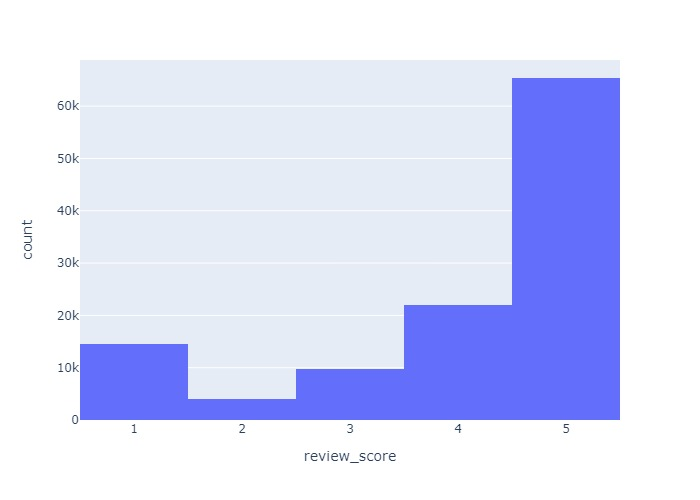

In [21]:
#  Verificando as notas de avaliações

fig = px.histogram(data, x="review_score")
fig.show()

Para melhor visualização resolvi aplicar em percentual as notas de avaliações

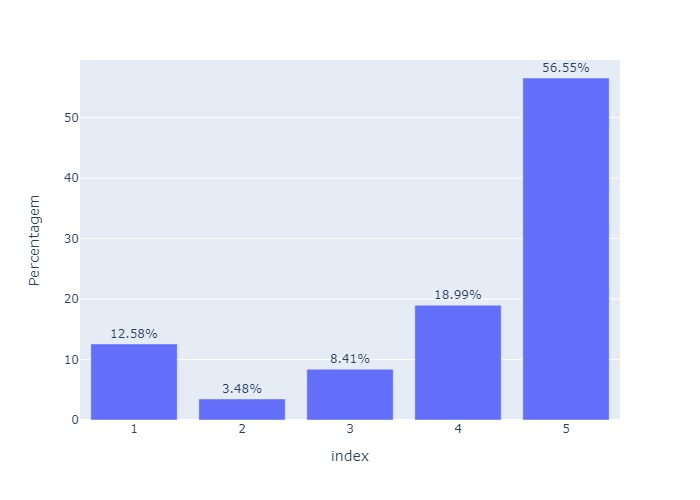

In [22]:
# Aqui apliquei o percentual das notas de avaliações
percentage = data["review_score"].value_counts(normalize=True) * 100

fig = px.bar(percentage, x=percentage.index, y=percentage.values, text=percentage.values, labels={"x": "Nota", "y": "Percentagem"})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()


Mais de**75% dos clientes deram uma pontuação igual ou maior que 4**,

12,5% deram uma pontuação de 1,

e cerca de 12% deram uma pontuação de 3 ou 2,

**56% deram nota máxima**

<h2 style="color: #6c5b7b">Proporção de clientes gerando a maior parte da receita.</h2>


<p>A <strong>Análise de Pareto</strong> é uma técnica importante para identificar e priorizar os elementos mais relevantes em um conjunto de dados, permitindo a concentração de esforços nas áreas mais críticas e relevantes, maximizando resultados e minimizando custos. É uma ferramenta simples e de fácil aplicação.</p>

<p>É a famosa regra 20/80, 20% que representam 80% do resultado</p>

<p>Podemos utilizar para várias análises! Vamos começar com a proporção de clientes que mais gastam.</p>


## Aqui verificamos os clientes que mais gastam!

In [23]:
# Clientes com o maior número cumulativo de pedidos (em pagamentos).
top_customers = data.groupby("customer_unique_id")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)

# Renomeamos a coluna para total_paid(pagamentos total)
top_customers.rename(columns={"payment_value":"total_paid"}, inplace=True)
top_customers

,customer_unique_id,total_paid
3724,0a0a92112bd4c708ca5fde585afaa872,109312.64
71634,c402f431464c72e27330a67f7b94d4fb,44048.00
23445,4007669dec559734d6f53e029e360987,36489.24
87489,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00
43207,763c8b1c9c68a0229c42c9fc6f662b93,29099.52
...,...,...
40726,6f5b9d1cdccc4d28f0483a612edecacf,11.63
14826,2878e5b88167faab17d4fb83a986d38b,11.63
65527,b33336f46234b24a613ad9064d13106d,10.89
69097,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07


###  Aqui calculamos o percentual de totais de vendas e acumulados das vendas
Isso é importante para definir as estratégias de cálculos futuros

In [24]:
# calcular as colunas "% of Total Sales" e "Cum % of Total Sales"
top_customers["% of Total Sales"] = (top_customers["total_paid"] / top_customers["total_paid"].sum()) * 100

# aqui calculamos o a cumulado das vendas
top_customers["Cum % of Total Sales"] = top_customers["% of Total Sales"].cumsum()
top_customers

,customer_unique_id,total_paid,% of Total Sales,Cum % of Total Sales
3724,0a0a92112bd4c708ca5fde585afaa872,109312.64,0.548496,0.548496
71634,c402f431464c72e27330a67f7b94d4fb,44048.00,0.221019,0.769514
23445,4007669dec559734d6f53e029e360987,36489.24,0.183091,0.952606
87489,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00,0.151464,1.104069
43207,763c8b1c9c68a0229c42c9fc6f662b93,29099.52,0.146012,1.250082
...,...,...,...,...
40726,6f5b9d1cdccc4d28f0483a612edecacf,11.63,0.000058,99.999788
14826,2878e5b88167faab17d4fb83a986d38b,11.63,0.000058,99.999847
65527,b33336f46234b24a613ad9064d13106d,10.89,0.000055,99.999901
69097,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07,0.000051,99.999952


Aqui percebemos que o cliente que mais paga representa **54% com total de vendas acima de 100mil**

## Os 3 clientes top que representam os que mais gastam !

In [25]:
# Aqui definimos os cliente top3 que mais gastam e representam 95% dos paganmentos
Clientes_Top3=top_customers[top_customers["total_paid"]>36000]
Clientes_Top3

,customer_unique_id,total_paid,% of Total Sales,Cum % of Total Sales
3724,0a0a92112bd4c708ca5fde585afaa872,109312.64,0.548496,0.548496
71634,c402f431464c72e27330a67f7b94d4fb,44048.00,0.221019,0.769514
23445,4007669dec559734d6f53e029e360987,36489.24,0.183091,0.952606


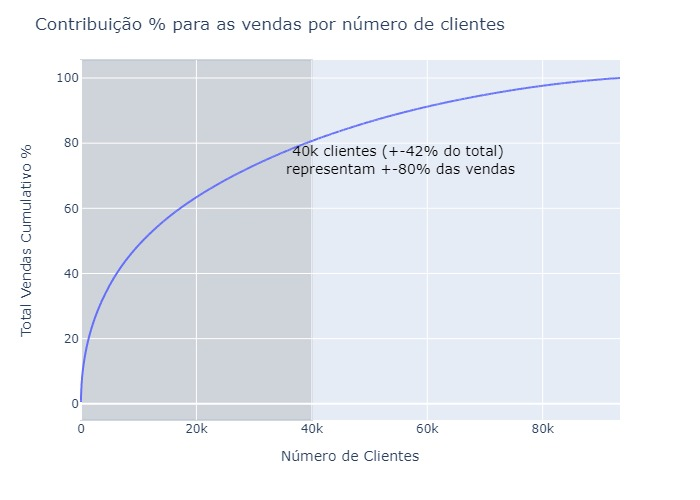

In [26]:


# criar um gráfico de linhas do Plotly

fig = px.line(top_customers, x=range(1, len(top_customers) + 1), y="Cum % of Total Sales")

# definir as etiquetas do eixo x e y e o título do gráfico
fig.update_layout(
    xaxis_title="Número de Clientes",
    yaxis_title="Total Vendas Cumulativo %",
    title="Contribuição % para as vendas por número de clientes"
)

# adicionar uma linha de preenchimento abaixo do gráfico
fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",
    x0=0,
    y0=0,
    x1=40000,
    y1=1,
    fillcolor="#797270",
    opacity=0.2,
    layer="below"
)

# atualizar o layout da forma para ajustar a altura do preenchimento
fig.update_shapes(dict(xref='x', yref='paper'))

# adicionar um texto explicativo na figura
fig.add_annotation(
    x=55000,
    y=75,
    text="40k clientes (+-42% do total)<br> representam +-80% das vendas",
    font=dict(
        size=14,
        color="black"
    ),
    showarrow=False,
)

# exibir a figura
fig.show()

<h2 style="color: #6c5b7b">Definimos o limiar dos 80% que representa clientes acima de 40k dentro da regra de pareto</h2>


Os resultados dessa análise podem gerar diversos insights para a área de marketing! Por exemplo:
- Segmentar clientes
- Monitorar os clientes que mais gastam
- Oferecer promoções tanto para que  mais pagam
- Incentivar vendas dos que menos pagam
- Criar política de fidelização de clientes
- Tentar vender mais produtos
- Realizar entregas personalizadas






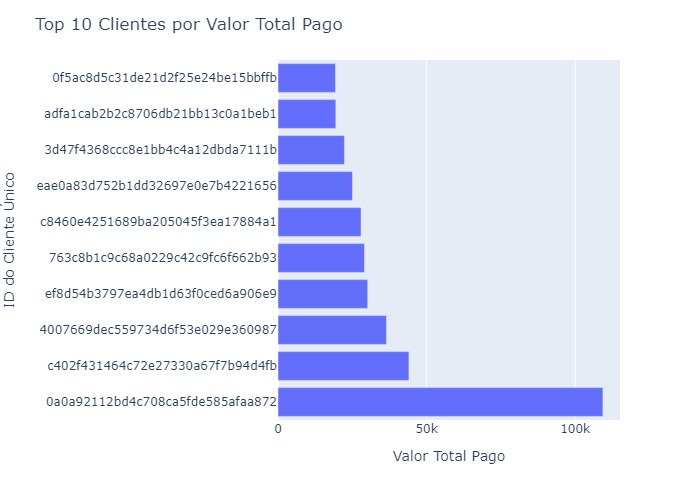

In [27]:
# renomear a coluna "payment_value" para "total_paid"
top_customers.rename(columns={"payment_value" : "total_paid"}, inplace=True)

# criar um gráfico de barras do Plotly
fig = px.bar(top_customers[:10], x="total_paid", y="customer_unique_id", orientation="h")

# atualizar as configurações de layout do gráfico
fig.update_layout(
    title="Top 10 Clientes por Valor Total Pago",
    xaxis_title="Valor Total Pago",
    yaxis_title="ID do Cliente Único"
)

# exibir o gráfico
fig.show()


Aqui verificamos que entre os **top 10 clientes estão cima de 20k**, isso pode sugerir futuramente com a área de negócio uma segmentação de clientes por faixa de gastos 

<h2 style="color: #6c5b7b">Principais cidades por número de pedidos por estado.</h2>


<p>Vamos verificar quais são as cidades que mais tem números de pedido!</p>



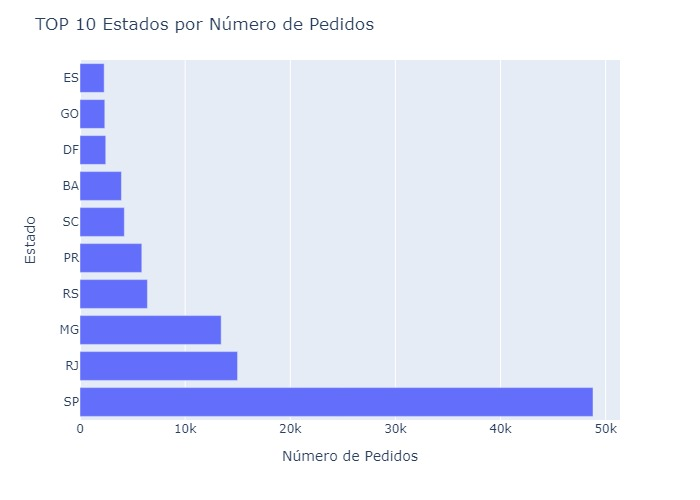

In [28]:
# agrupar o dataframe por "customer_state" e contar o número de "order_id" por estado
top_orders_cities = data.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending=False)

# renomear a coluna "order_id" para "count"
top_orders_cities.rename(columns={"order_id":"count"}, inplace=True)

# criar um gráfico de barras do Plotly
fig = px.bar(top_orders_cities[:10], x="count", y="customer_state", orientation="h")

# atualizar as configurações de layout do gráfico
fig.update_layout(
    title="TOP 10 Estados por Número de Pedidos",
    xaxis_title="Número de Pedidos",
    yaxis_title="Estado"
)

# exibir o gráfico
fig.show()


**SP** é estado que possui maior número de pedido aproxidamente **48k mil pedidos**

**RJ** e **MG** um pouco acima dos **13k mil pedidos**

Isso leva a concluir que **SP** é lider de vendas

<h2 style="color: #6c5b7b">Cidades com maior geração de receita.</h2>


<p>Agora podemos avaliar não a quantidade de pedidos mas o quanto de GRANA cada cidade traz :D</p>



In [29]:
# Agrupamento de cidade por pagamentos somadosb
top_ordersbyvalue_cities = data.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_ordersbyvalue_cities

,customer_city,payment_value
3574,sao paulo,2807526.03
3135,rio de janeiro,1536347.93
451,belo horizonte,492767.96
556,brasilia,428036.30
1139,curitiba,327886.88
...,...,...
3383,santo antonio do rio abaixo,24.23
3770,tamboara,24.09
1947,jenipapo de minas,22.58
2908,polo petroquimico de triunfo,20.70


## Calculando os percentuais e acumulados dos pagamentos por cidades

In [30]:

# Aqui calculamos o percentual dos pagamentos por cidades
top_ordersbyvalue_cities["% of Total Payments"] = (top_ordersbyvalue_cities["payment_value"] / top_ordersbyvalue_cities["payment_value"].sum()) * 100

# Aqui calculamos o acumulado do percentual dos pagamentos por cidade
top_ordersbyvalue_cities["Cum % of Total Payments"] = top_ordersbyvalue_cities["% of Total Payments"].cumsum()
top_ordersbyvalue_cities

,customer_city,payment_value,% of Total Payments,Cum % of Total Payments
3574,sao paulo,2807526.03,14.087265,14.087265
3135,rio de janeiro,1536347.93,7.708901,21.796166
451,belo horizonte,492767.96,2.472552,24.268717
556,brasilia,428036.30,2.147749,26.416466
1139,curitiba,327886.88,1.645231,28.061697
...,...,...,...,...
3383,santo antonio do rio abaixo,24.23,0.000122,99.999559
3770,tamboara,24.09,0.000121,99.999680
1947,jenipapo de minas,22.58,0.000113,99.999794
2908,polo petroquimico de triunfo,20.70,0.000104,99.999898


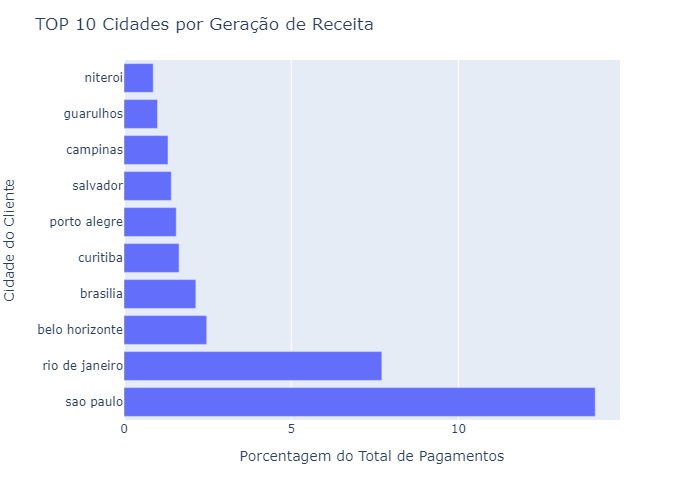

In [31]:
# criar um gráfico de barras do Plotly
fig = px.bar(top_ordersbyvalue_cities[:10], x="% of Total Payments", y="customer_city", orientation="h")

# atualizar as configurações de layout do gráfico
fig.update_layout(
    title="TOP 10 Cidades por Geração de Receita",
    xaxis_title="Porcentagem do Total de Pagamentos",
    yaxis_title="Cidade do Cliente"
)

# exibir o gráfico
fig.show()


Aqui valida que **SP** têm os maior percentual de pagamentos seguida por RJ.

## Buscando número de cidade que contribuem com 80% das vendas

In [32]:
print("Número de cidades que contribuem com 80% das vendas totais:",
      len(top_ordersbyvalue_cities[top_ordersbyvalue_cities["Cum % of Total Payments"] <= 80]),
      "ou em in %:",
      (len(top_ordersbyvalue_cities[top_ordersbyvalue_cities["Cum % of Total Payments"] <= 80]) / len(top_ordersbyvalue_cities)) * 100)

Número de cidades que contribuem com 80% das vendas totais: 358 ou em in %: 8.746640605912534


In [33]:
# buscando um range que inicia em 1 linha e vai ao total de linhas de todas cidades
x=range(1, len(top_ordersbyvalue_cities)+1)
x

range(1, 4094)

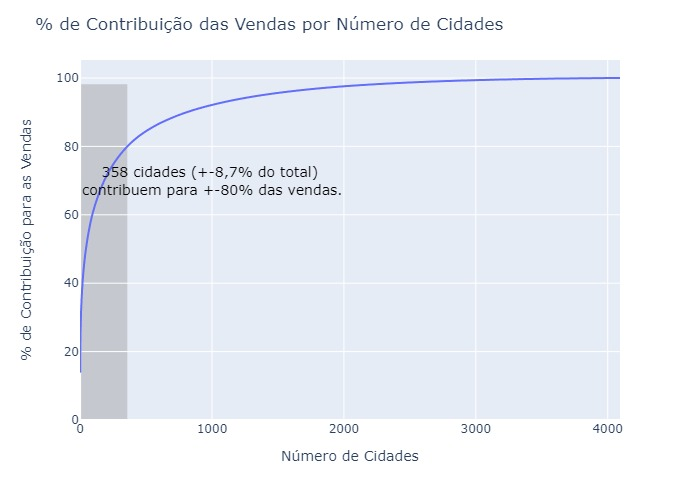

In [34]:
# criar um gráfico de linha do Plotly
fig = px.line(top_ordersbyvalue_cities, x=range(1, len(top_ordersbyvalue_cities)+1), y="Cum % of Total Payments")

# atualizar as configurações de layout do gráfico
fig.update_layout(
    title="% de Contribuição das Vendas por Número de Cidades",
    xaxis_title="Número de Cidades",
    yaxis_title="% de Contribuição para as Vendas"
)

# preencher a área abaixo da curva
fig.add_shape(
    type="rect",
    xref="x",
    yref="y",
    x0=0,
    y0=0,
    x1=358,
    y1=top_ordersbyvalue_cities["Cum % of Total Payments"][357],
    fillcolor="#797270",
    opacity=0.3,
    layer="below",
    line_width=0
)

# adicionar um texto ao gráfico
fig.add_annotation(
    x=1000,
    y=70,
    text="358 cidades (+-8,7% do total) <br>contribuem para +-80% das vendas.",
    font=dict(
        size=14,
        color="black"
    ),
    showarrow=False
)

# exibir o gráfico
fig.show()


Pela regra de pareto aplicadad no gráfico acima, verificamos que 358 cidades representam 80% das dos pagamentos

<h2 style="color: #6c5b7b">Como os pedidos variam ao longo do tempo?</h2>


<p>Como os pedidos são feitos ao longo do dia? De manhã? De tarde? Na madruga? Às segundas, sábados? É importante saber se estamos vendendo mais ou menos, nos horários e dias das semana!</p>



In [35]:
# Total de pedidos por hora e dia da semana
# Mas antes precisamos converter as colunas de datas para datetime
datesCols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", 
            "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", 
            "review_creation_date", "review_answer_timestamp"]

for col in datesCols:
    data[col] = pd.to_datetime(data[col])

In [36]:
# Orders by hour(ordem tempo de pedido)
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])

# agrupando a ordem do pedido por tempo de pedido em horas
orderbyhour = orders_df.groupby(orders_df["order_purchase_timestamp"].dt.hour)["order_id"].count().reset_index().sort_values(by="order_purchase_timestamp", ascending=False)
# renomeando colunas
orderbyhour.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Hour of Day"}, inplace=True)
orderbyhour

,Hour of Day,Total Orders
23,23,4123
22,22,5816
21,21,6217
20,20,6193
19,19,5982
18,18,5769
17,17,6150
16,16,6675
15,15,6454
14,14,6569


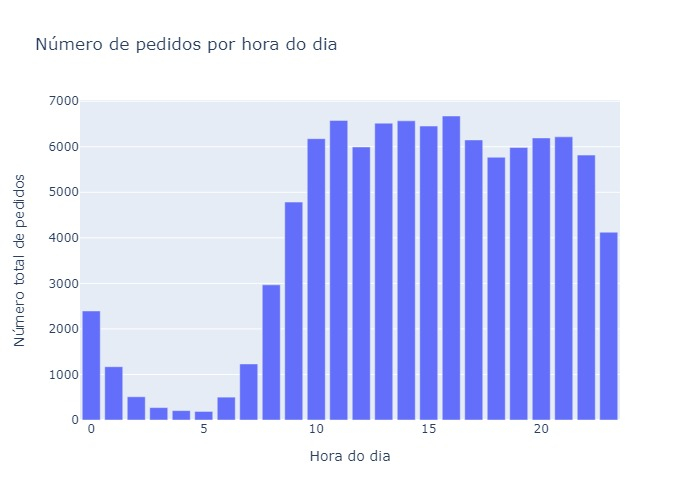

In [37]:
# plotando gráficos 
fig = px.bar(orderbyhour, x='Hour of Day', y='Total Orders', title='Número de pedidos por hora do dia')
fig.update_xaxes(title='Hora do dia')
fig.update_yaxes(title='Número total de pedidos')
fig.show()


Os pedidos começam a aumentar por volta das 6hs da manhã e atingem o pico às 16hs da tarde.

**O período da tarde é bastante significativo em número de pedidos**

## Buscando as ordem de pedidos por dia da semana

In [38]:
# Orders by day of the week (ordem de pedido dia  agrupado)
orderbydow = data.groupby(data["order_purchase_timestamp"].dt.day_name())["order_id"].count().reset_index()
# renomeando coluna
orderbydow.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Weekday Name"}, inplace=True)
# ordenando por total de ordem
orderbydow = orderbydow.sort_values(by="Total Orders", ascending=False)
orderbydow

,Weekday Name,Total Orders
1,Monday,18769
5,Tuesday,18768
6,Wednesday,18033
4,Thursday,17301
0,Friday,16532
3,Sunday,13722
2,Saturday,12484


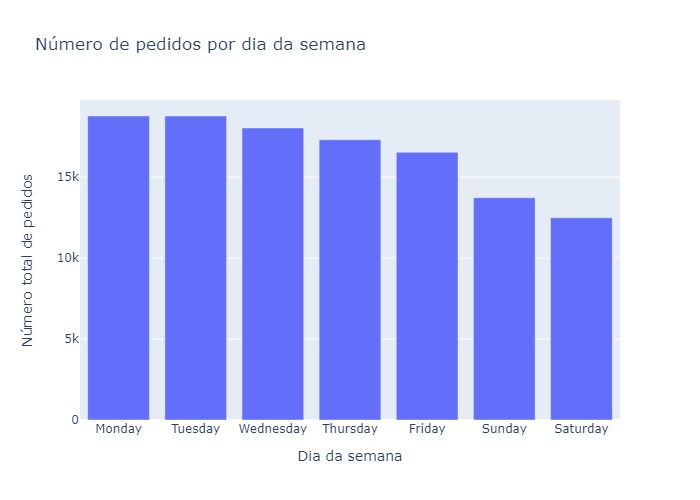

In [39]:
fig = px.bar(orderbydow, x='Weekday Name', y='Total Orders', title='Número de pedidos por dia da semana')
fig.update_xaxes(title='Dia da semana')
fig.update_yaxes(title='Número total de pedidos')
fig.show()


Os pedidos atingem o pico no início da semana (segunda e terça-feira) e começam a declinar um pouco depois,
verifica-se o **final de semana tem uma leve queda nos pedidos** mas com pouca discrepãncia

## Abaixo mesmo gráfico acima ordenado e categorizados!

In [40]:
# Define a ordem dos dias da semana
#weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converte a coluna "Weekday Name" em uma categoria ordenada
#weekday = pd.Categorical(orderbydow['Weekday Name'], categories=weekday_order, ordered=True)

# Cria um novo dataframe ordenado pela coluna de categoria "weekday"
#orderbydow_ordered = orderbydow.assign(weekday=weekday).sort_values('weekday')

# Cria um gráfico de barras com os dias da semana em ordem
#fig = px.bar(orderbydow_ordered, x='weekday', y='Total Orders', title='Número de pedidos por dia da semana')
#fig.update_xaxes(title='Dia da semana')
#fig.update_yaxes(title='Número total de pedidos')
#fig.show()


<h2 style="color: #6c5b7b">Como os produtos são avaliados?</h2>


<p>De que adianta vender muito, entregar rápido, se as notas dos clientes estiverem baixas? Isso queima o filme de qualquer negócio! Vamos entrar mais a fundo na questão.</p>



## Agrupar os produtos comos reviews e agregar as médias e contagens 

In [41]:
# agrupar produtos por reviews e agregar a média e a contagem
reviewsocres = data.groupby("product_category_name")["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)
reviewsocres

,mean,count
product_category_name,,
cds_dvds_musicais,4.642857,14
fashion_roupa_infanto_juvenil,4.500000,8
livros_interesse_geral,4.438503,561
livros_importados,4.419355,62
flores,4.419355,31
...,...,...
casa_conforto_2,3.642857,28
fashion_roupa_masculina,3.548611,144
moveis_escritorio,3.526791,1773


In [42]:
# Buscando os 10 produtos com contagens maiores ou igual a 30 
bestrated = reviewsocres[reviewsocres["count"]>=30][:10]
bestrated

,mean,count
product_category_name,,
livros_interesse_geral,4.438503,561
livros_importados,4.419355,62
flores,4.419355,31
construcao_ferramentas_ferramentas,4.415842,101
livros_tecnicos,4.375465,269
alimentos_bebidas,4.324138,290
portateis_casa_forno_e_cafe,4.320513,78
malas_acessorios,4.295945,1159
fashion_esporte,4.258065,31


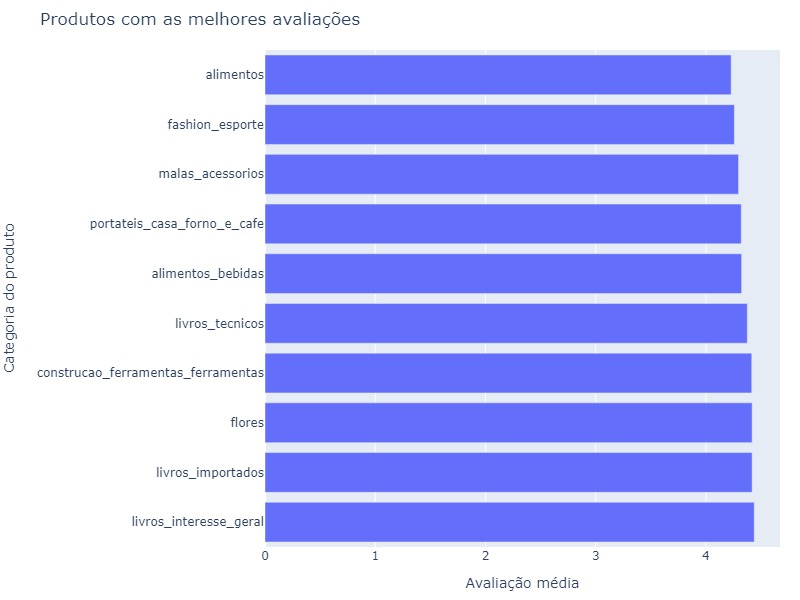

In [43]:
# plotando os melhores avaliados

fig = go.Figure(go.Bar(
            x=bestrated['mean'],
            y=bestrated.index,
            orientation='h'))

fig.update_layout(
    title='Produtos com as melhores avaliações',
    xaxis_title='Avaliação média',
    yaxis_title='Categoria do produto',
    height=600,
    width=800,
    margin=dict(l=100, r=20, t=50, b=50),
)

fig.show()


Aqui percebe-se que os produtos bem avaliados estão com notas acima de 4, sendo considerados a nota máxima 5,produtos como:alimentos, livros técnico, construção e etc, produtos diversos se enquadram como bem avaliados,isso leva a concluir que não é tipo de produto que faz ser bem avaliado, e sim, alguma a operação no serviço prestado. 

## Buscando os piores avaliados

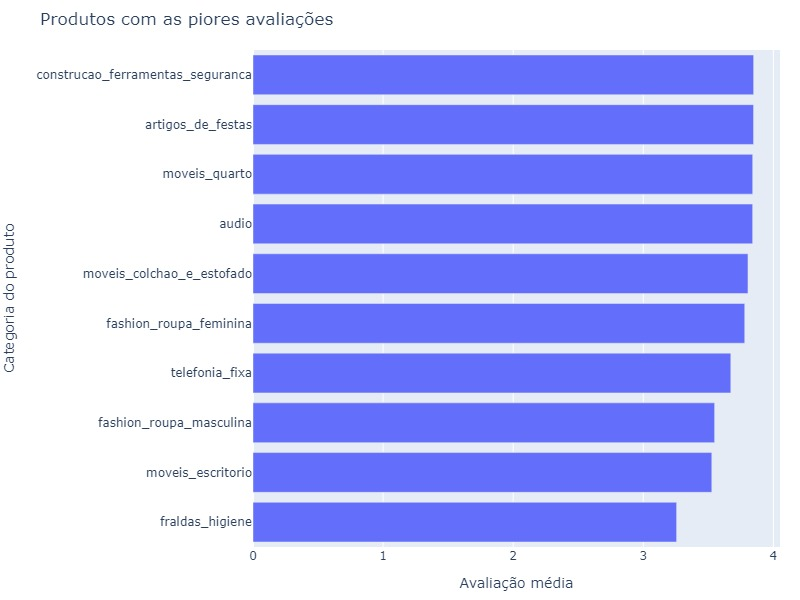

In [44]:
# buscando os piores avaliados
reviewsocres = data.groupby("product_category_name")["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)
worstrated = reviewsocres[reviewsocres["count"]>=30].sort_values(by='mean')[:10]

fig = go.Figure(go.Bar(
            x=worstrated['mean'],
            y=worstrated.index,
            orientation='h'))

fig.update_layout(
    title='Produtos com as piores avaliações',
    xaxis_title='Avaliação média',
    yaxis_title='Categoria do produto',
    height=600,
    width=800,
    margin=dict(l=100, r=20, t=50, b=50),
)

fig.show()


Os piores scores estão acima de 3, produtos de categoria variadas com:móveis, roupa feminna, fraldas e etc, validando a hipótese que não é o tipo de de produto e sim a operação realizada, salientando que os piores score não pode ser considerados com maus avaliados.

## Aqui é interessante gerar uma variável de pedido entregue e cancelados

<h2 style="color: #6c5b7b">Será que o método de pagamento afeta o status do pedido?</h2>


<p>.</p>



In [45]:
#  aqui gero uma tabela cruzada entre tipo de pagamento e status do pediddo
cashvscancel = pd.crosstab(data["payment_type"], data["order_status"])

# gerando informações de pedidos entregue e devolvidos
cashvscancel = cashvscancel[["canceled", "delivered"]]
cashvscancel

order_status,canceled,delivered
payment_type,,
boleto,92,22029
credit_card,411,83536
debit_card,6,1623
voucher,27,6022


In [46]:

# percentual e pedidos cancelado e entregues
cashvscancel["% Canceled"] = (cashvscancel["canceled"] / cashvscancel["delivered"] ) * 100
# Criando a txa  de cancelamento rateada
cashvscancel["Avg Cancelation Rate"] = (len(data[data["order_status"] == "canceled"]) / len(data[data["order_status"] == "delivered"])) * 100
cashvscancel


order_status,canceled,delivered,% Canceled,Avg Cancelation Rate
payment_type,,,,
boleto,92,22029,0.417631,0.473456
credit_card,411,83536,0.492003,0.473456
debit_card,6,1623,0.369686,0.473456
voucher,27,6022,0.448356,0.473456


Apesar das taxas de cancelamentos ser muito próximas, **existe um aumento nos cancelamento do cartão de créditos**

<h2 style="color: #6c5b7b">Existe alguma relação entre o tempo de entrega e as pontuações das avaliações?</h2>


<p>.</p>



Aqui subtraimos o tempo de entrega pelo tempo de pedido

In [47]:
# verificando o tempo d entrega
data["TimeToDeliveryinHours"] = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"])
data["TimeToDeliveryinHours"] 

0        8 days 10:28:40
1        8 days 10:28:40
2        8 days 10:28:40
3        2 days 20:15:12
4        5 days 00:05:14
               ...      
115604   3 days 01:37:20
115605   5 days 23:51:19
115606   4 days 13:34:58
115607   3 days 19:28:56
115608   3 days 19:28:56
Name: TimeToDeliveryinHours, Length: 115609, dtype: timedelta64[ns]

Aqui transformamos em total de segundos aplicando o total_seconds que defini o difrenção da data inicial até a data final

In [48]:
from datetime import time, timedelta 

# definindo o total do tempo em segundos desde a data de inicio até o final
data["TimeToDeliveryinHours"] = data["TimeToDeliveryinHours"].apply(lambda x: x.total_seconds())
data["TimeToDeliveryinHours"]

0         728920.0
1         728920.0
2         728920.0
3         245712.0
4         432314.0
            ...   
115604    265040.0
115605    517879.0
115606    394498.0
115607    329336.0
115608    329336.0
Name: TimeToDeliveryinHours, Length: 115609, dtype: float64

Aqui dividimos o total em segundo em minutos(3600) divido por 24 horas para definir o total de dias

In [49]:
# Aqui definimos o tempo de entrega em DIAS
data["TimeToDeliveryinHours"] = round((data["TimeToDeliveryinHours"] / 3600) / 24,2)
data["TimeToDeliveryinHours"]

0         8.44
1         8.44
2         8.44
3         2.84
4         5.00
          ... 
115604    3.07
115605    5.99
115606    4.57
115607    3.81
115608    3.81
Name: TimeToDeliveryinHours, Length: 115609, dtype: float64

In [50]:
# renomeando para total de dias de entrega
data.rename(columns={"TimeToDeliveryinHours" : "TimeToDeliveryinDays"}, inplace=True)
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,TimeToDeliveryinDays
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,8.44
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,voucher,1,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,8.44
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,voucher,1,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,8.44
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,3,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19,2017-08-20 15:16:36,2.84
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08,2017-08-08 23:26:23,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,1,6bb18295cc019bf3b6dc7c773411d530,04ee0ec01589969663ba5967c0e0bdc0,2018-08-27 11:50:47,289.49,24.83,artes_e_artesanato,47.0,1002.0,3.0,190

# OBS: Logo abaixo encapsulei todo o código na série acima!

In [51]:
# Adicionando uma coluna delta que calcula o tempo que levou para o pedido ser entregue
#data["TimeToDeliveryinHours"] = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"])
#data["TimeToDeliveryinHours"] = data["TimeToDeliveryinHours"].apply(lambda x: x.total_seconds())
#data["TimeToDeliveryinHours"] = round((data["TimeToDeliveryinHours"] / 3600) / 24, 2)
#data.rename(columns={"TimeToDeliveryinHours" : "TimeToDeliveryinDays"}, inplace=True)

In [52]:
# Principais estatísticas do tempo de entrega
data[["TimeToDeliveryinDays"]].describe()

,TimeToDeliveryinDays
count,113209.000000
mean,12.442130
std,9.356005
min,0.530000
25%,6.740000
50%,10.190000
75%,15.500000
max,208.350000


**O tempo médio de entrega é relativamente (12 dias)**, sendo que metadde das entregas são feitas até a mediana de (10 dias).porém observamos um **valor extremo atípico de 208 dias**.

O boxplot é um gráfico que mostra como um conjunto de dados está distribuído, destacando informações como a mediana (valor que divide os dados em duas partes iguais), os valores mínimo e máximo e a presença de dados incomuns. Ele é útil para identificar a forma como os dados estão agrupados e se existem pontos que se destacam do restante do conjunto.

In [53]:
# passo 1;Define a ordem crescente dos valores da pontuação de avaliação
score_order = sorted(data['review_score'].unique())
score_order

[1, 2, 3, 4, 5]

In [54]:
# Passo 2;Converte a coluna "review_score" em uma categoria ordenada
score = pd.Categorical(data['review_score'], categories=score_order, ordered=True)
score

[4, 4, 4, 4, 5, ..., 5, 5, 5, 3, 3]
Length: 115609
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [55]:
# Passo3; Cria um novo dataframe ordenado pela coluna de categoria "score"
data_ordered = data.assign(score=score).sort_values('score')
data_ordered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,TimeToDeliveryinDays,score
42285,04626f2c41e6a49d4c2102a7d410797a,615ae88261f09750647dcdb0cd6858d2,delivered,2017-11-27 10:47:32,2017-11-27 11:14:35,2017-11-30 22:45:37,2018-01-08 21:43:48,2017-12-21,23a944d718f96d95c768d97f07b330fb,88352,brusque,SC,1,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2017-12-04 11:14:35,53.99,15.13,perfumaria,44.0,334.0,1.0,200.0,16.0,16.0,13.0,perfumery,1,debit_card,1,69.12,9015,santo andre,SP,367599fbac10d81599b18a4c7172c0b2,1,NaN,É com muita tristeza que venho realizar essa a...,2017-12-22,2017-12-22 09:18:12,42.46,1
61966,fd86c80924b4be8fb7f58c4ecc680dae,db76ebd0d51c2b3cc44d84cd6df46336,delivered,2018-03-08 19:37:45,2018-03-08 20:28:42,2018-03-09 18:04:46,2018-03-16 01:30:56,2018-03-27,22b05429f5f6165b033dd8ee7cee1150,37701,pocos de caldas,MG,1,d22bbc02259111e107ee7916637d4791,8d956fec2e4337affcb520f56fd8cbfd,2018-03-14 20:28:42,69.99,12.93,esporte_lazer,58.0,1074.0,5.0,700.0,16.0,11.0,11.0,sports_leisure,3,voucher,1,44.87,9780,sao bernardo do campo,SP,4bedd975d93b4a2af65ba61e8b0935d0,1,NaN,NaN,2018-03-17,2018-03-26 02:12:14,7.25,1
61967,fd86c80924b4be8fb7f58c4ecc680dae,db76ebd0d51c2b3cc44d84cd6df46336,delivered,2018-03-08 19:37:45,2018-03-08 20:28:42,2018-03-09 18:04:46,2018-03-16 01:30:56,2018-03-27,22b05429f5f6165b033dd8ee7cee1150,37701,pocos de caldas,MG,1,d22bbc02259111e107ee7916637d4791,8d956fec2e4337affcb520f56fd8cbfd,2018-03-14 20:28:42,69.99,12.93,esporte_lazer,58.0,1074.0,5.0,700.0,16.0,11.0,11.0,sports_leisure,2,voucher,1,44.87,9780,sao bernardo do campo,SP,4bedd975d93b4a2af65ba61e8b0935d0,1,NaN,NaN,2018-03-17,2018-03-26 02:12:14,7.25,1
61968,fd86c80924b4be8fb7f58c4ecc680dae,db76ebd0d51c2b3cc44d84cd6df46336,delivered,2018-03-08 19:37:45,2018-03-08 20:28:42,2018-03-09 18:04:46,2018-03-16 01:30:56,2018-03-27,22b05429f5f6165b033dd8ee7cee1150,37701,pocos de caldas,MG,1,d22bbc02259111e107ee7916637d4791,8d956fec2e4337affcb520f56fd8cbfd,2018-03-14 20:28:42,69.99,12.93,esporte_lazer,58.0,1074.0,5.0,700.0,16.0,11.0,11.0,sports_leisure,1,credit_card,1,76.10,9780,sao bernardo do campo,SP,4bedd975d93b4a2af65ba61e8b0935d0,1,NaN,NaN,2018-03-17,2018-03-26 02:12:14,7.25,1
90176,3a3239fa60ea2f77a53990f66c3f1a45,939e0c3e47b5402a26179847300547ca,delivered,2018-03-02 17:37:53,2018-03-02 17:50:37,2018-03-27 15:12:52,2018-04-04 15:43:43,2018-04-11,87e10490e24f34fe5a034de34504f055,22240,rio de janeiro,RJ,2,e53e557d5a159f5aa2c5e995dfdf244b,88460e8ebdecbfecb5f9601833981930,2018-03-08 17:50:37,76.25,16.97,informatica_acessorios,33.0,256.0,1.0,180.0,17.0,10.0,13.0,computers_accessories,1,credit_card,2,186.44,87030,maringa,PR,d0233fbba83f61318f600b4f27d4e57d,1,NaN,Entregaram cartucho errado. Pedi 02 cartuchos ...,2018-04-05,2018-04-05 22:37:19,32.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26578,0681602384769af218b41f80e0808278,c50bb4c9a6ef2510dc6c3b6c9d2871a3,delivered,2018-01-22 12:38:35,2018-01-22 14:24:55,2018-01-25 15:28:49,2018-01-31 21:14:36,2018-02-14,a5e783156c30ef47a0209fe04f0c8f73,19160,alvares machado,SP,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-01-26 14:24:53,49.90,13.37,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,

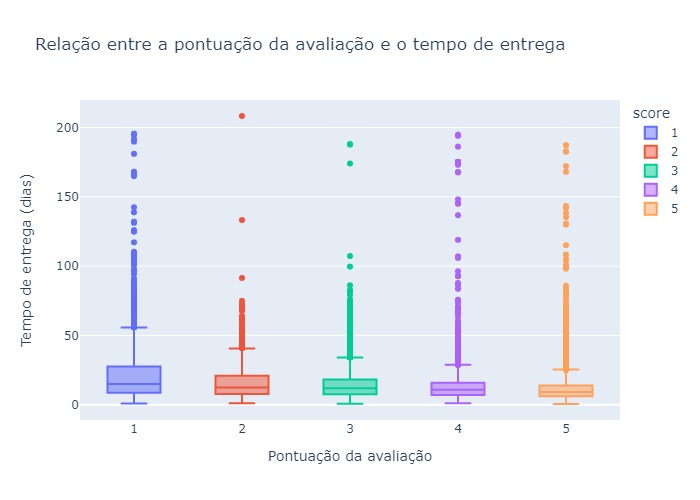

In [56]:
# Passo 4;Cria um seletor de pontuação de avaliação em ordem crescente
fig = px.box(data_ordered, x='score', y='TimeToDeliveryinDays', color='score',
             title='Relação entre a pontuação da avaliação e o tempo de entrega')
fig.update_xaxes(title='Pontuação da avaliação')
fig.update_yaxes(title='Tempo de entrega (dias)')

fig.show()

Verifica-se que existem muitos dados extremos 

# OBS: Logo abaixo encapsulei todo o código na série acima do passo1 ao 4!

In [57]:

# Define a ordem crescente dos valores da pontuação de avaliação
#score_order = sorted(data['review_score'].unique())

# Converte a coluna "review_score" em uma categoria ordenada
#score = pd.Categorical(data['review_score'], categories=score_order, ordered=True)

# Cria um novo dataframe ordenado pela coluna de categoria "score"
#data_ordered = data.assign(score=score).sort_values('score')

# Cria um seletor de pontuação de avaliação em ordem crescente
#fig = px.box(data_ordered, x='score', y='TimeToDeliveryinDays', color='score',
             #title='Relação entre a pontuação da avaliação e o tempo de entrega')

#fig.update_xaxes(title='Pontuação da avaliação')
#fig.update_yaxes(title='Tempo de entrega (dias)')

#fig.show()


## Podemos ver que temos vários valores atípicos. Estes são pedidos que demoraram muito para serem entregues por algum motivo.

In [58]:
# Define o limite superior dos valores
q_high = data["TimeToDeliveryinDays"].quantile(0.95)
q_high

28.89

## OBS: AQUI GEREI UM DATAFRAME SEM OS OUTLIERS(TEMPO DE ENTREGA)

In [59]:
# Cria um novo dataframe sem os valores atípicos
data_no_outliers = data[data["TimeToDeliveryinDays"] < q_high]
data_no_outliers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,TimeToDeliveryinDays
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,8.44
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,voucher,1,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,8.44
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,voucher,1,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,8.44
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,3,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19,2017-08-20 15:16:36,2.84
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08,2017-08-08 23:26:23,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,1,6bb18295cc019bf3b6dc7c773411d530,04ee0ec01589969663ba5967c0e0bdc0,2018-08-27 11:50:47,289.49,24.83,artes_e_artesanato,47.0,1002.0,3.0,190

## AQUI É DATAFRAME SOMENTE COM OUTLIERS (TEMPO DE ENTREGA)

In [60]:
# Cria um novo dataframe COM os valores atípicos
outliers = data[data["TimeToDeliveryinDays"] > q_high]
outliers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,TimeToDeliveryinDays
59,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,1,credit_card,10,356.12,89165,rio do sul,SC,5caca29ffffe9086162ca51303817420,1,NaN,"Inicialmente, na data da compra o produto era ...",2017-12-22,2017-12-28 11:25:32,33.90
228,2c353c9011928609140c2fe8c3f925a5,e8e3d8d996f2b2945feab63c6c337989,delivered,2018-02-02 12:32:57,2018-02-06 05:31:46,2018-02-07 22:52:39,2018-03-07 19:32:59,2018-03-12,b1502798d0e249048594a2d3e708fcc6,96230,santa vitoria do palmar,RS,1,60142008404f92c16972d1cb6dd0e3c8,98dac6635aee4995d501a3972e047414,2018-02-12 04:31:58,52.11,15.11,utilidades_domesticas,58.0,1567.0,1.0,2000.0,16.0,20.0,11.0,housewares,1,boleto,1,67.22,2030,sao paulo,SP,c14edc0d83dfc6fcf76fa3365fba442e,5,NaN,"ÓTIMA COMPRA, ÓTIMO PRODUTO, ENTREGA DENTRO DO...",2018-03-08,2018-03-09 03:42:55,33.29
368,9b4ce65d237bc82227e4b550d1ddf079,24c4f807cb6e92665d8f59e753657ccf,delivered,2018-03-15 13:30:01,2018-03-15 13:49:28,2018-03-16 22:04:33,2018-04-24 01:32:35,2018-04-04,c296bb63ae3787f081bcc184b913acee,27274,volta redonda,RJ,1,c20a3f598c16d77249da67e81caa8317,955fee9216a65b617aa5c0531780ce60,2018-03-21 13:49:28,33.00,19.32,utilidades_domesticas,57.0,529.0,4.0,575.0,16.0,18.0,12.0,housewares,1,credit_card,1,52.32,4782,sao paulo,SP,d322c3ce8acfdb77982ca62d7e886a34,1,NaN,Meu produto estava previsto para entrega até d...,2018-04-06,2018-04-06 12:24:32,39.50
370,2ad674d5024f5e52836b96215eb73588,f1a46a71a91a14089a5aaebb43f0620e,delivered,2018-04-16 20:39:18,2018-04-16 23:12:08,2018-04-17 22:21:46,2018-05-16 20:51:49,2018-05-11,b2bec1967ec4645d89fe1ea0c6460c30,88015,florianopolis,SC,1,c20a3f598c16d77249da67e81caa8317,955fee9216a65b617aa5c0531780ce60,2018-04-22 23:12:08,33.00,16.32,utilidades_domesticas,57.0,529.0,4.0,575.0,16.0,18.0,12.0,housewares,1,credit_card,1,49.32,4782,sao paulo,SP,fb969030f27ca2b98031a354b03d836b,1,produto nao entregue,recebi um email das lannister informando que h...,2018-05-13,2018-05-14 17:58:08,30.01
375,51759d8321ae577fc2d577b976f8130f,de5b74249fb3f1947ae0286c6098b576,delivered,2018-04-23 12:58:35,2018-04-24 17:45:41,2018-04-24 22:38:48,2018-07-02 23:18:11,2018-05-28,14054237c41b123b682dbcff19e9ca6b,22620,rio de janeiro,RJ,1,c20a3f598c16d77249da67e81caa8317,955fee9216a65b617aa5c0531780ce60,2018-04-27 13:31:20,33.00,16.32,utilidades_domesticas,57.0,529.0,4.0,575.0,16.0,18.0,12.0,housewares,1,credit_card,1,49.32,4782,sao paulo,SP,a6c581f28d2a12e3862f6e7b5bcd5c63,1,Não recebi,Está perdido nos Correios.,2018-05-30,2018-06-01 12:15:16,70.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115482,fb612793f43e55d0df079f56c7ffb811,0b87eea12c9bc8ae36b6e4c551f4770e,delivered,2017-11-28 20:41:00,2017-11-29 02:16:49,2017-12-01 16:11:50,2017-12-27 19:58:56,2017-12-19,945a0478f858996b861b5c9b1905e56c,22451,rio de janeiro,RJ,1,3cdb91cbeb22b6e87c8b595b68df

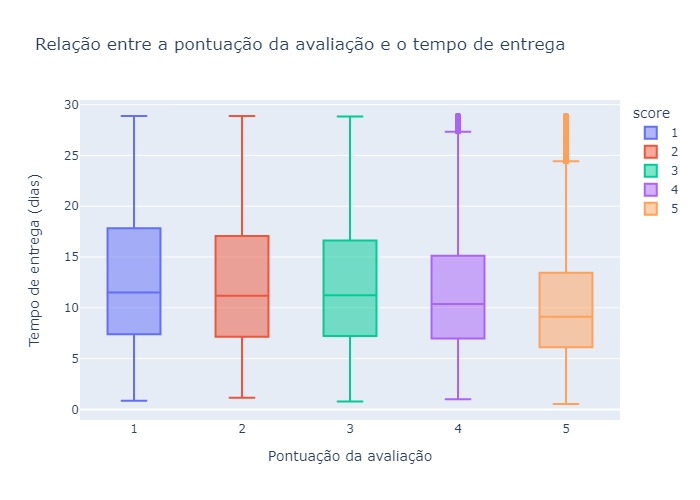

In [61]:
# Define o limite superior dos valores
q_high = data["TimeToDeliveryinDays"].quantile(0.95)

# Cria um novo dataframe sem os valores atípicos
data_no_outliers = data[data["TimeToDeliveryinDays"] < q_high]

# Define a ordem crescente dos valores da pontuação de avaliação
score_order = sorted(data_no_outliers['review_score'].unique())

# Converte a coluna "review_score" em uma categoria ordenada
score = pd.Categorical(data_no_outliers['review_score'], categories=score_order, ordered=True)

# Cria um novo dataframe com a coluna de categoria "score"
data_score = data_no_outliers.assign(score=score)

data_score = data_score.assign(score=score).sort_values('score')

# Cria um seletor de pontuação de avaliação em ordem crescente
fig = px.box(data_score, x='score', y='TimeToDeliveryinDays', color='score',
             title='Relação entre a pontuação da avaliação e o tempo de entrega')

fig.update_xaxes(title='Pontuação da avaliação', categoryorder='array', categoryarray=score_order)
fig.update_yaxes(title='Tempo de entrega (dias)')

fig.show()


O tempo de entrega é uma variável que tem relação direta com as pontuações, a hipótese confirma que
**à medida que o tempo de entrega diminui, as avaliações aumentam**.



<h2 style="color: #6c5b7b">Quais são as cidades dos vendedores com menor/maior tempo de entrega?</h2>


<p>.</p>



Aqui pegamos as cidades agrupando pelo tempo de entrega em dias e agregamos valores mìnimos, máximo. contagem e o  desvio , depois dropamos os valores ausentes e ordenamos pela média resetando os índices

In [62]:
#Vendedores com melhor tempo d entrega
sellersdeliverytime = data.groupby("seller_city")["TimeToDeliveryinDays"].agg(["min", "max", "mean", "std", "count" ]).dropna().sort_values("mean").reset_index()
sellersdeliverytime

,seller_city,min,max,mean,std,count
0,cravinhos,1.95,1.95,1.950000,0.000000,3
1,orlandia,3.51,3.51,3.510000,0.000000,6
2,brotas,3.31,4.81,3.685000,0.750000,4
3,ao bernardo do campo,1.61,8.96,4.330000,4.030099,3
4,franco da rocha,1.43,10.15,4.393750,3.230192,8
...,...,...,...,...,...,...
522,itajobi,6.05,187.74,29.119545,37.614555,22
523,monte alto,9.57,74.93,32.303333,23.822301,6
524,portoferreira,47.10,47.10,47.100000,0.000000,2
525,manaus,23.04,90.96,47.840000,37.483308,3


Aqui foi feito uma filtaragem dos vendedores com 30 ou mais pedidos

In [63]:
# Filtro para vendedores com 30 ou mais pedidos em seu histórico
sellersdeliverytime = sellersdeliverytime[sellersdeliverytime["count"]>=30]
sellersdeliverytime

,seller_city,min,max,mean,std,count
14,varzea paulista,2.58,21.07,5.877297,3.284975,37
41,hortolandia,1.39,71.09,7.587543,6.676258,350
53,ribeirao preto / sao paulo,2.45,27.32,7.944500,4.055726,40
60,rio claro,1.70,34.88,8.144035,6.283043,114
61,ferraz de vasconcelos,1.17,20.84,8.186316,6.443319,38
...,...,...,...,...,...,...
503,tubarao,6.01,81.33,19.930286,20.308568,35
504,balneario camboriu,3.25,79.36,20.641613,17.449918,31
507,congonhal,4.31,60.82,21.590463,12.736508,108
509,itaquaquecetuba,1.61,194.85,21.838281,12.911572,1734


## Quais vendendores mais rápidos e mais lentos?

In [64]:
# aqui buscamos as 10 entregas mais rápidas
fastestdeliverysellers = sellersdeliverytime[:10]
# aqui buscamos as 10 piores entregas
slowestdeliverysellers = sellersdeliverytime.sort_values("mean", ascending=False)[:10]

In [65]:
# Vendedores com entrega mais rápida.
fastestdeliverysellers

,seller_city,min,max,mean,std,count
14,varzea paulista,2.58,21.07,5.877297,3.284975,37
41,hortolandia,1.39,71.09,7.587543,6.676258,350
53,ribeirao preto / sao paulo,2.45,27.32,7.944500,4.055726,40
60,rio claro,1.70,34.88,8.144035,6.283043,114
61,ferraz de vasconcelos,1.17,20.84,8.186316,6.443319,38
63,vicente de carvalho,1.54,42.43,8.309910,6.604570,221
67,poa,1.09,38.20,8.533029,6.005796,175
70,carazinho,3.16,19.13,8.640656,3.858348,61
79,betim,1.24,53.85,8.818312,6.242661,314
85,maua,1.51,42.57,8.977107,5.455932,484


Aqui percebe-se que o vendedor mais rápido em tempo de entrega Têm **média 5 dias para entregar porém ele têm poucos pedidos**

In [66]:
# Vendedores com entrega mais lenta.
slowestdeliverysellers

,seller_city,min,max,mean,std,count
515,mombuca,6.03,88.24,22.921515,17.782976,33
509,itaquaquecetuba,1.61,194.85,21.838281,12.911572,1734
507,congonhal,4.31,60.82,21.590463,12.736508,108
504,balneario camboriu,3.25,79.36,20.641613,17.449918,31
503,tubarao,6.01,81.33,19.930286,20.308568,35
499,foz do iguacu,2.98,92.78,19.490833,17.240529,192
492,bombinhas,5.13,68.10,18.875761,9.758911,92
491,criciuma,3.73,71.16,18.396000,15.760557,35
488,claudio,5.73,48.63,18.171318,8.158321,129
482,caucaia,3.14,138.88,17.841471,23.052995,34


O vendedor mais lento têm tempo de entrega média de **22 dias e com poucos pedidos, isso leva a concluir que o gargalos se encontra na logística e não quantidades de pedidos**

## Quais os scores médios por cidades nos reviews?

In [67]:
# Junte a pontuação média de avaliação à tabela acima.
avg_review_score_seller = data.groupby("seller_city")["review_score"].mean().dropna().sort_values(ascending=False).reset_index()
avg_review_score_seller

,seller_city,review_score
0,uruguaiana,5.0
1,minas gerais,5.0
2,nova trento,5.0
3,viana,5.0
4,ronda alta,5.0
...,...,...
599,pirassununga,1.0
600,portoferreira,1.0
601,rio branco,1.0
602,santo antonio da patrulha,1.0


## Aqui juntamos a tabela de melhores tempo de entrega com as médias de reviews

In [68]:
sellerPerf = sellersdeliverytime.merge(avg_review_score_seller, on="seller_city")
sellerPerf

,seller_city,min,max,mean,std,count,review_score
0,varzea paulista,2.58,21.07,5.877297,3.284975,37,4.648649
1,hortolandia,1.39,71.09,7.587543,6.676258,350,4.323864
2,ribeirao preto / sao paulo,2.45,27.32,7.944500,4.055726,40,4.300000
3,rio claro,1.70,34.88,8.144035,6.283043,114,4.400000
4,ferraz de vasconcelos,1.17,20.84,8.186316,6.443319,38,3.675000
...,...,...,...,...,...,...,...
249,tubarao,6.01,81.33,19.930286,20.308568,35,3.916667
250,balneario camboriu,3.25,79.36,20.641613,17.449918,31,4.290323
251,congonhal,4.31,60.82,21.590463,12.736508,108,3.104348
252,itaquaquecetuba,1.61,194.85,21.838281,12.911572,1734,3.435927


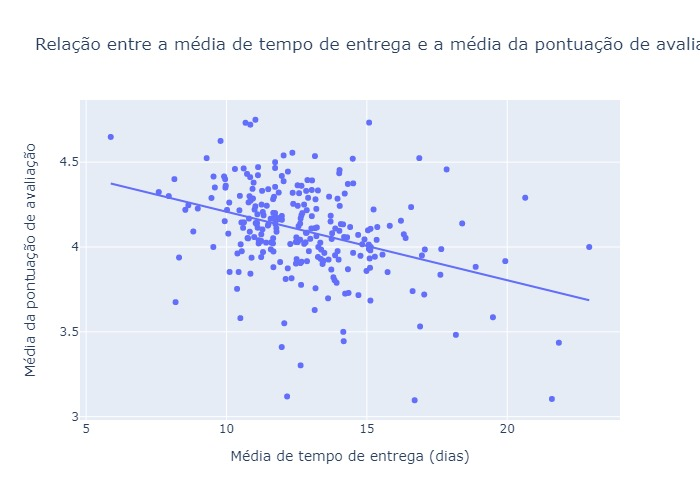

In [69]:
# Gráfico de regressão linear entre a média de tempo de entrega e a média da pontuação de avaliação
fig = px.scatter(sellerPerf, x='mean', y='review_score', trendline='ols', 
                 title='Relação entre a média de tempo de entrega e a média da pontuação de avaliação')

fig.update_xaxes(title='Média de tempo de entrega (dias)')
fig.update_yaxes(title='Média da pontuação de avaliação')

fig.show()


Aqui  validamos que **quanto mais rápido a entrega melhor  avaliação**

<h2 style="color: #6c5b7b"> Quais os Estados com maior e menor tempo de entrega?</h2>


<p>.</p>



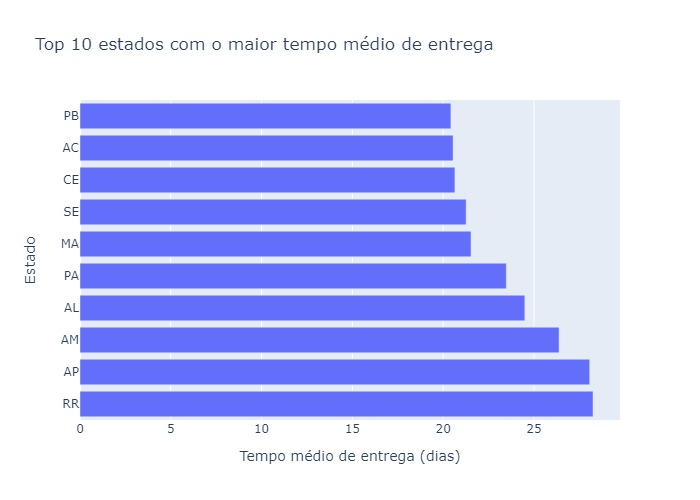

In [70]:
# Top 10 estados com o maior tempo médio de entrega
highestTTDstates = data.groupby("customer_state")["TimeToDeliveryinDays"].mean().dropna().sort_values(ascending=False).reset_index()
# Buscando os top 10
highestTTDstates = highestTTDstates[:10]

# Gráfico de barras com o tempo médio de entrega por estado
fig = px.bar(highestTTDstates, x='TimeToDeliveryinDays', y='customer_state',
             orientation='h', title='Top 10 estados com o maior tempo médio de entrega')

fig.update_yaxes(title='Estado')
fig.update_xaxes(title='Tempo médio de entrega (dias)')

fig.show()


O estado com maior tempo de entrega é RR,AP e AM, **SALIENTANDO QUE OS 10 MAIORES TEMPO DE ENTREGA POR ESTADOS ESTÃO ACIMA DE 20 DIAS DE ENTREGA**

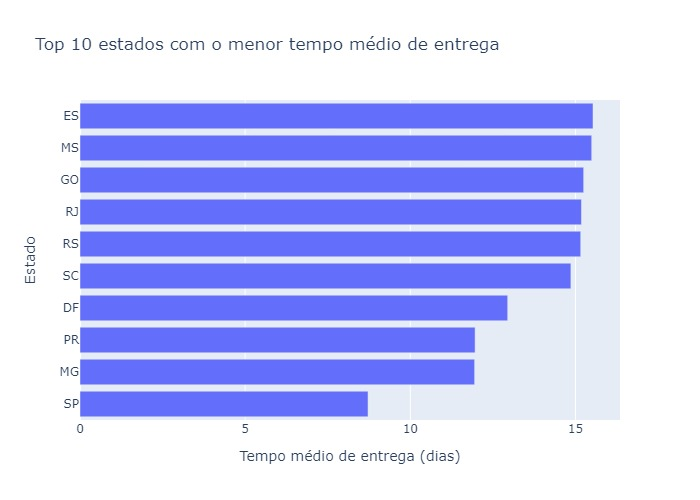

In [71]:
# Top 10 estados com o menor tempo médio de entrega
lowestTTDstates = data.groupby("customer_state")["TimeToDeliveryinDays"].mean().dropna().sort_values(ascending=True).reset_index()
lowestTTDstates = lowestTTDstates[:10]

# Gráfico de barras com o tempo médio de entrega por estado
fig = px.bar(lowestTTDstates, x='TimeToDeliveryinDays', y='customer_state',
             orientation='h', title='Top 10 estados com o menor tempo médio de entrega')

fig.update_yaxes(title='Estado')
fig.update_xaxes(title='Tempo médio de entrega (dias)')

fig.show()


Aqui percebe-se que **SP TÊM O MENOR TEMPO DE ENTREGA 9 DIAS, ENQUANTO OS OUTROS ATÉ 16 DIAS!**


<h2 style="color: #6c5b7b">Como o tempo médio de entrega varia ao longo do tempo?</h2>


<p>.</p>



Aqui calculamos a mediana dos valores anuais por tempo de entrega para verificar as variações nas entregas, transformamos em string para plotar um gráfico

In [72]:
# Mediana do tempo de entrega por ano
deliverytimevstime = data.groupby(data["order_purchase_timestamp"].dt.year)["TimeToDeliveryinDays"].median().dropna()
deliverytimevstime

order_purchase_timestamp
2016    17.95
2017    11.00
2018     9.43
Name: TimeToDeliveryinDays, dtype: float64

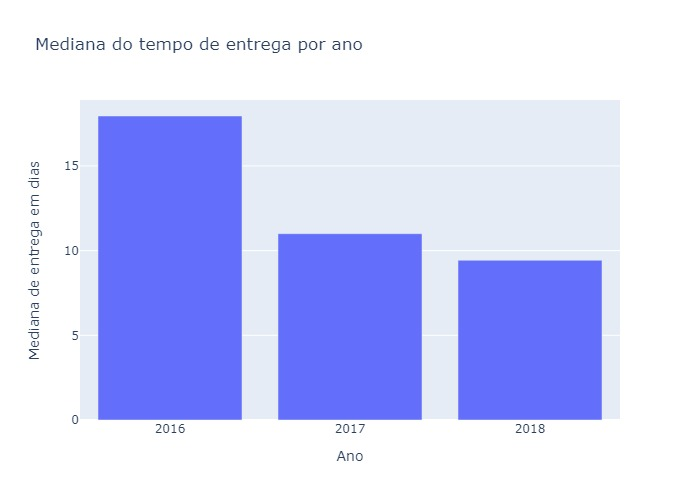

In [73]:


# Converte ano em categoria (e não um número)
deliverytimevstime.index = deliverytimevstime.index.astype(str)

# Gráfico de barras com a mediana do tempo de entrega por ano
fig = px.bar(deliverytimevstime, x=deliverytimevstime.index, y='TimeToDeliveryinDays',
             title='Mediana do tempo de entrega por ano')

fig.update_xaxes(title='Ano')
fig.update_yaxes(title='Mediana de entrega em dias')

fig.show()


A empresa melhorou sua logística e reduziu considerávelmente o tempo de entrega ao longo dos anos, **em 2016 era acima de 16 dias, em 2017 reduziu para 12 dias , e em 2018  cerca de 9 dias**.

<h2 style="color: #6c5b7b">Como a pontuação média das avaliações varia ao longo do tempo?</h2>


<p>.</p>



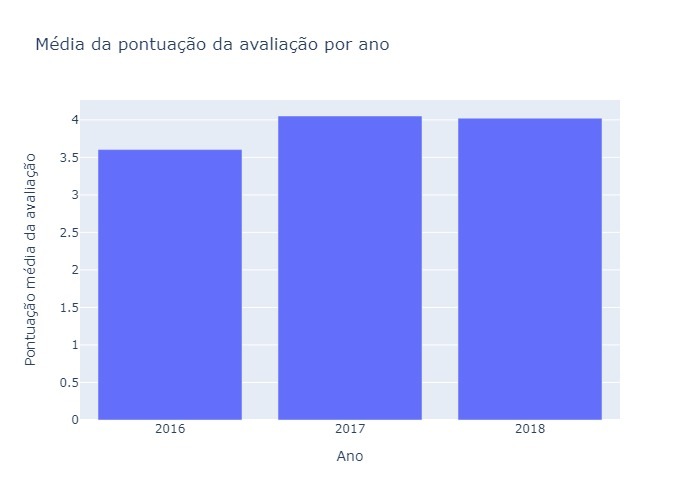

In [74]:
# Média da pontuação da avaliação por ano
scorevstime = data.groupby(data["order_purchase_timestamp"].dt.year)["review_score"].mean().dropna()

# Converte o índice do grupo em uma categoria
scorevstime.index = scorevstime.index.astype(str)

# Gráfico de barras com a média da pontuação da avaliação por ano
fig = px.bar(scorevstime, x=scorevstime.index, y='review_score',
             title='Média da pontuação da avaliação por ano')

fig.update_xaxes(title='Ano')
fig.update_yaxes(title='Pontuação média da avaliação')

fig.show()


Em 2017 e 2018, as avaliações melhoraram em relação à 2016, **DEVIDO AOS MELHORES TEMPO DE ENTREGAS**

<h2 style="color: #6c5b7b">Quais são as categorias de produtos mais vendidas?</h2>


<p>.</p>


 AQUI AGRUPAMOS A CATEGORIA DE PRODUTOS, AGREGOU PELA ORDEM DE VALORES ÚNICOS E PELA SOMA DOS PAYMENTS , DEPOIS ORDENAMOS DECRESCENTE E BUSCAMOS AS 10 MAIORES CATEGORIAS

In [75]:
# AGRUAPANDO CATEGORIA DE PRODUTOS 
top_categ_by_revenue = data.groupby("product_category_name").agg({'order_id':'nunique','payment_value':'sum'}).sort_values("payment_value", ascending=False)[:10]

# RENOMEANDO A COLUNA  ORDERID E PAYMENT

top_categ_by_revenue.rename(columns={"order_id":"NumOfOrders", "payment_value":"Revenues"}, inplace=True)


In [76]:
top_categ_by_revenue

,NumOfOrders,Revenues
product_category_name,,
cama_mesa_banho,9313,1725465.67
beleza_saude,8770,1646292.53
informatica_acessorios,6649,1592611.66
moveis_decoracao,6398,1427214.01
relogios_presentes,5576,1420682.17
esporte_lazer,7669,1390581.87
utilidades_domesticas,5843,1091709.15
ferramentas_jardim,3496,834757.45
automotivo,3877,802254.74


Dos top 10 produtos os 3 mais vendidos, destacam-se:

**CAMA_MESA_BANHO**,

**BELEZA_SAÚDE**, 

**INFORMÁTICA_ACESSÓRIOS**